In [ ]:
### This notebook contains code for the plots in Figure 5 and Extended Data Figure 12

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb
import ma_codes as codes
from ma_codes import mysize, gray_red, mymap
import pertpy as pt
%matplotlib inline
import math

sc.settings.verbosity = 3               # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_version_and_date()

import warnings
warnings.filterwarnings("ignore")

Running Scanpy 1.10.2, on 2025-04-22 10:10.


In [2]:
plot_folder = "/home/gotej/Projects/Aging_BleoModel/Plots/"

plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams.update({'font.size': 14})
plt.rcParams['pdf.fonttype'] = 42

### IL-15 Stimulated T cells

In [3]:
df1 = pd.read_csv("/home/gotej/Projects/Aging_BleoModel/Data/qPCR_T cells_IL15_Gadd45b_GZMK_final.csv")
df1.set_index("gene", inplace=True)
df1.head()

,Control,IL15_stim
gene,,
Gzmk,2.302221,2.672106
Pdcd1,1.922755,3.666395
Cxcr6,1.644773,2.196095
Itag4,0.995973,0.494624


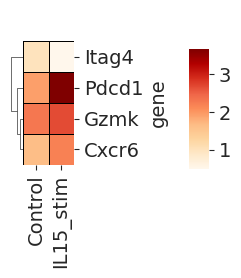

In [4]:
g = sb.clustermap(df1,
                  linewidths=0.5, 
                  linecolor="black", 
                  cmap="OrRd", 
                  method='complete', 
                  metric='euclidean', 
                  z_score=None, 
                  standard_scale=None, 
                  figsize=(2, 3), 
                  cbar_kws={"orientation": "vertical"},  # optional, but explicit
                  row_cluster=True, 
                  col_cluster=False, 
                  row_linkage=None, 
                  col_linkage=None)

g.cax.set_position([1, .4, .1, .4])  # [left, bottom, width, height] – adjust as needed

plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)

plt.savefig("/home/gotej/Projects/Aging_BleoModel/Paper_figures/figures/" + "_Heatmap_Tcells_IL-15_stim_qPCR.pdf", bbox_inches='tight')


### Average Expression Plotting

In [5]:
object_folder = "/media/HDD_1/Janine/Aging_SingleCell/data_objects/"
adata = sc.read(object_folder + "230111_Bleo_Ageing_annotated_final.h5ad")

#### GZMK in lymphoycyte compartment

In [6]:
L =  adata[adata.obs.meta_label.isin(['T cells', 'B cells', 'Plasma cells', 'NK'])].copy()

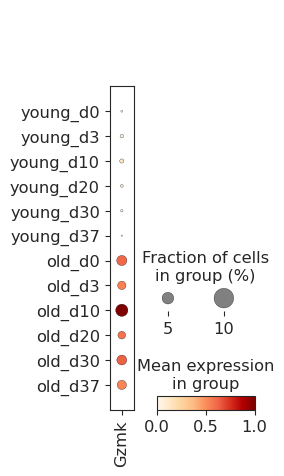

In [7]:
sc.pl.dotplot(L, var_names=["Gzmk"], groupby=["age", "day"], cmap="OrRd", standard_scale="var", save="_GZMK_lymphocytes.pdf")

In [8]:
#### IL-15 in whole dataset

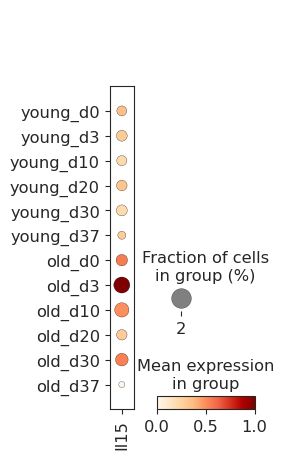

In [9]:
sc.pl.dotplot(adata, var_names=["Il15"], groupby=["age", "day"], cmap="OrRd", standard_scale="var",
              dot_min=0, dot_max=0.02, save="_IL-15_wholedataset.pdf")

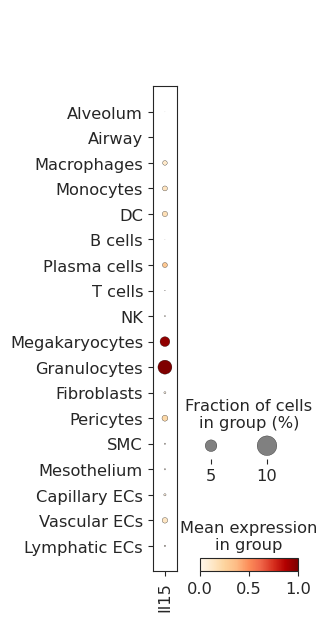

In [10]:
sc.pl.dotplot(adata, var_names=["Il15"], groupby=["meta_label"], cmap="OrRd", standard_scale="var",
              dot_min=0, dot_max=0.1, save="_IL-15_meta_Label.pdf")

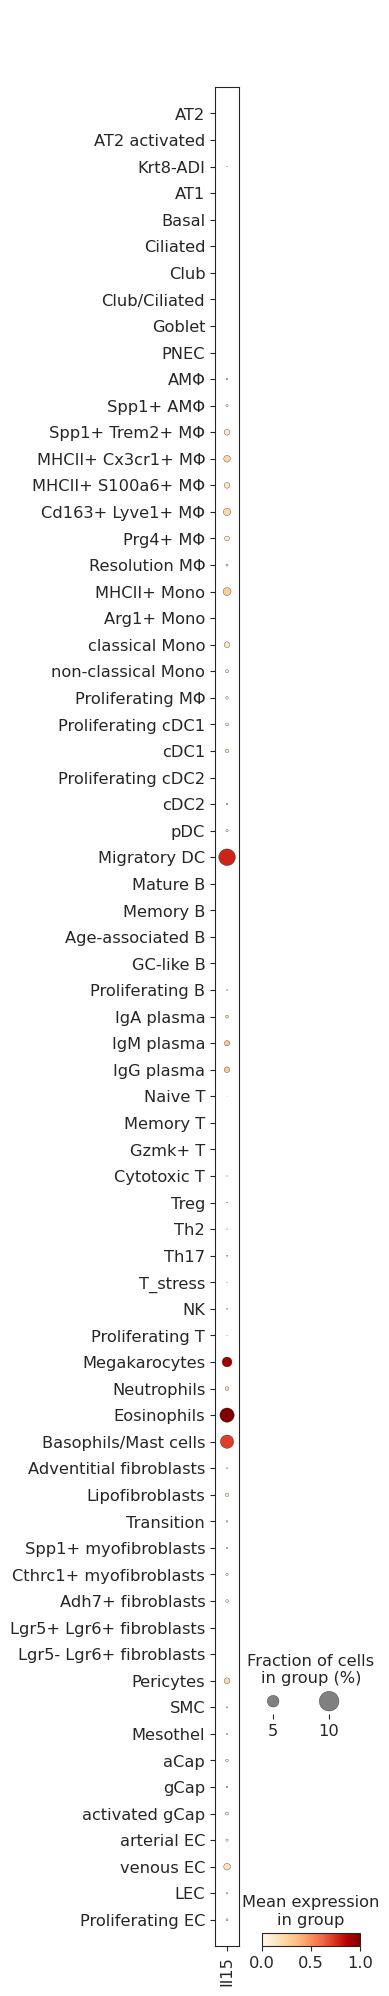

In [11]:
sc.pl.dotplot(adata, var_names=["Il15"], groupby=["cell_type"], standard_scale="var",
              cmap="OrRd", dot_min=0, dot_max=0.1, save="_IL-15_cell_type.pdf")

#### IL-15 in granulocytes

In [12]:
granu =  adata[adata.obs.meta_label.isin(['Granulocytes'])].copy()

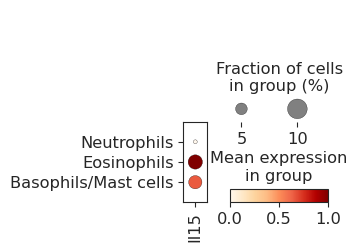

In [13]:
sc.pl.dotplot(granu, var_names=["Il15"], groupby=["cell_type"], cmap="OrRd", standard_scale="var", 
              dot_min=0, dot_max=0.1, save="_IL-15_granulocytes.pdf")

### Cytokine Array - GZMK-stimulated AT2

In [14]:
df2 = pd.read_excel("/home/gotej/Projects/Aging_BleoModel/Data/GZMK-treated_AT2_cytokine_array.xlsx")
df2_subset = df2[["Protein", "Fold change"]].set_index("Protein")
df2_subset.head()

,Fold change
Protein,
CCL2/MCP-1,0.266099
Coagulation Factor III/ Tissue Factor,1.205556
CXCL16,1.235630
Cystatin C,0.351866
FGF-21,0.858430


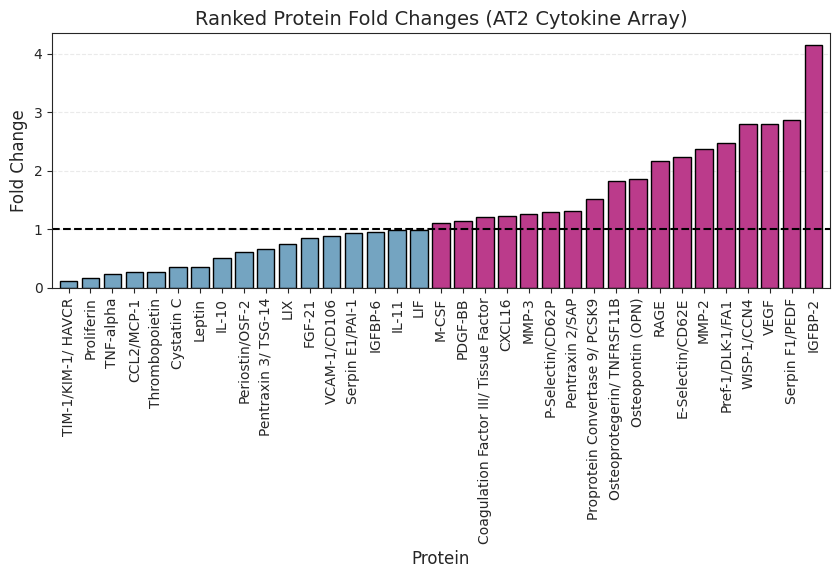

In [28]:
mean_fc_sorted = df2_subset["Fold change"].sort_values()

colors = ['#74A4C1' if val < 1 else '#BB3B8B' for val in mean_fc_sorted]

num_proteins = len(mean_fc_sorted)
fig_width = max(num_proteins * 0.25, 6)  # Adjust for tight fit but minimum width

plt.figure(figsize=(fig_width, 6))
bars = plt.bar(mean_fc_sorted.index, mean_fc_sorted.values,
               color=colors, edgecolor='black', width=0.8)

# Line at fold change = 1
plt.axhline(y=1, color='black', linestyle='--')

plt.ylabel("Fold Change", fontsize=12)
plt.xlabel("Protein", fontsize=12)
plt.title("Ranked Protein Fold Changes (AT2 Cytokine Array)", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.margins(x=0.01)  # remove extra margin around bars
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

# Save to file
plt.savefig("/home/gotej/Projects/Aging_BleoModel/Paper_figures/figures/" + "_Barplot_AT2_cytokine_array_vertical.pdf")


In [16]:
import session_info
session_info.show()